In [1]:
from yolo3_one_file_to_detect_them_all import (WeightReader, make_yolov3_model, decode_netout, draw_boxes,
correct_yolo_boxes, do_nms, preprocess_input)
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# get all of the results above a threshold
def get_boxes_v2(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores

In [65]:
model = make_yolov3_model()
weight_reader = WeightReader('model_data/yolov3.weights')

In [66]:
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [44]:
model.save('model.h5')

In [3]:
# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3
 
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height
 
# load yolov3 model
model = load_model('ball.weights')


/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Tensor("conv_105/BiasAdd:0", shape=(None, None, None, 18), dtype=float32)
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]


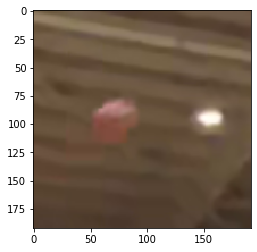

In [28]:
# define the expected input shape for the model
photo_filename = '/Users/tonylambropoulos/Downloads/1/267.png'
orig_image = cv2.imread(photo_filename)
h, w, c = orig_image.shape
input_w, input_h = h, w
net_w, net_h = 192, 192

print(model.outputs[-1])

# define our new photo

# load and prepare image

image = preprocess_input(orig_image, net_h, net_w)
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
plt.imshow(image[0,:,:,:])

In [29]:
anchors = [[47,52, 57,52, 60,58], [61,63, 67,41, 68,67], [75,68, 81,78, 162,78]]#[[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
# define the probability threshold for detected objects
class_threshold = 0.60
boxes = list()
for i in range(len(yhat)):
    # decode the output of the network
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold,0.8, net_h, net_w)
print([(b.get_label(), b.get_score(), b.xmin, b.ymax) for b in boxes if b.get_score() > 0])

1
1
1
[(0, 0.8192702, 0.21359544138734537, 0.6630365310443772), (0, 0.715299, 0.22349484202762443, 0.6641193423420191)]


In [30]:
correct_yolo_boxes(boxes, input_h, input_w, net_h, net_w)
print([(b.get_label(), b.get_score(), b.xmin, b.xmax, b.ymin, b.ymax) for b in boxes if b.get_score() > 0])

[(0, 0.8192702, 21, 52, 38, 66), (0, 0.715299, 22, 53, 38, 66)]


In [31]:
labels = ["ball"]
do_nms(boxes, 0.45)

In [32]:
print(image[0,:,:,:].shape, orig_image.shape)
res = draw_boxes(orig_image, boxes, labels, class_threshold)

(192, 192, 3) (100, 100, 3)
ball: 81.92701935768127%


In [33]:
cv2.imwrite("zebra_det.jpg", res)

True

In [39]:
# define the expected input shape for the model
labels = ["ball"]
for x in range(89, 324):
    photo_filename = '/Users/tonylambropoulos/Downloads/1/%d.png' % x
    orig_image = cv2.imread(photo_filename)
    if orig_image is None:
        continue
    h, w, c = orig_image.shape
    print(h, w)
    input_w, input_h = h, w
    net_w, net_h = 192, 192

    #print(model.outputs[-1])

    # define our new photo

    # load and prepare image
    try:
        image = preprocess_input(orig_image, net_h, net_w)
    except:
        continue
    # make prediction
    yhat = model.predict(image)
    # summarize the shape of the list of arrays
    print([a.shape for a in yhat])
    anchors = [[47,52, 57,52, 60,58], [61,63, 67,41, 68,67], [75,68, 81,78, 162,78]]#[[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
    # define the probability threshold for detected objects
    class_threshold = 0.60
    boxes = list()
    for i in range(len(yhat)):
        # decode the output of the network
        boxes += decode_netout(yhat[i][0], anchors[i], class_threshold,0.8, net_h, net_w)
    correct_yolo_boxes(boxes, input_h, input_w, net_h, net_w)
    
    do_nms(boxes, 0.45)
    res = draw_boxes(orig_image, boxes, labels, class_threshold)
    cv2.imwrite("./results/%d.jpg" % x, res)
    

100 98
100 98
100 99
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 69.23690438270569%
100 99
100 97
100 98
100 97
100 91
100 91
100 91
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 74.78800415992737%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 98
100 95
100 87
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 82
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 77
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 77
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 78.22261452674866%
100 71
100 62
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 53
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 47
100 36
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 97
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1

[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 67.09670424461365%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 77.80550122261047%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 81.92701935768127%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 73.22273850440979%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 76.11486911773682%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 75.13219714164734%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 74.10569787025452%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
ball: 77.91836261749268%
100 100
[(1, 6, 6, 18), (1, 12, 12, 18), (1, 24, 24, 18)]
1
1
1
100 100
[(1, 6, 6, 18), (1, 12, 12, 18),